# Dados e Visualizações

Curso de Análise de dados para saúde e medicina da Alura.
Neste curso serão analisados os dados de COVID-19 distribuídos por várias fontes.

Fonte dos dados de casos confirmados: CSSEGISandData/COVID-19
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

### Importando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
confirmados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [3]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,43851,44228,44443,44503,44706,44988,45280,45490,45716,45839
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008


In [4]:
confirmados.shape

(271, 315)

In [5]:
# Casos confirmados por país
confirmados_por_pais = confirmados.groupby("Country/Region").sum()
confirmados_por_pais

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,...,43851,44228,44443,44503,44706,44988,45280,45490,45716,45839
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,29837,30623,31459,32196,32761,33556,34300,34944,35600,36245
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,70629,71652,72755,73774,74862,75867,77000,78025,79110,80168
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,6018,6066,6142,6207,6256,6304,6351,6428,6534,6610
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,13922,14134,14267,14413,14493,14634,14742,14821,14920,15008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,66186,67296,68768,70254,71644,73196,75007,76727,78493,80429
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,2083,2086,2090,2093,2099,2107,2114,2124,2137,2148


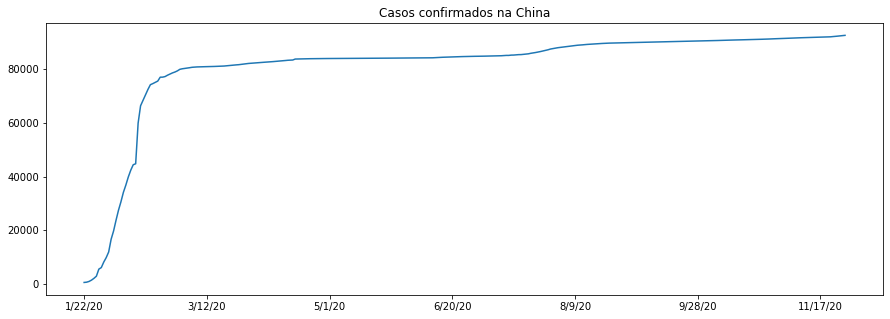

In [6]:
# Casos confirmados na China
plt.figure(figsize = (15, 5))
confirmados_por_pais.loc["China"][2:].plot()
plt.title("Casos confirmados na China")
plt.show()

In [26]:
# Plotando novos casos
novos_casos_china = confirmados_por_pais.loc["China"][2:].diff().dropna()

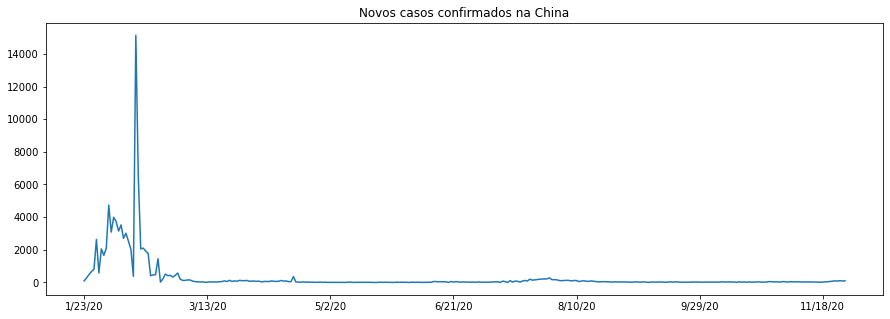

In [27]:
plt.figure(figsize=(15, 5))
novos_casos_china.plot()
plt.title("Novos casos confirmados na China")
plt.show()

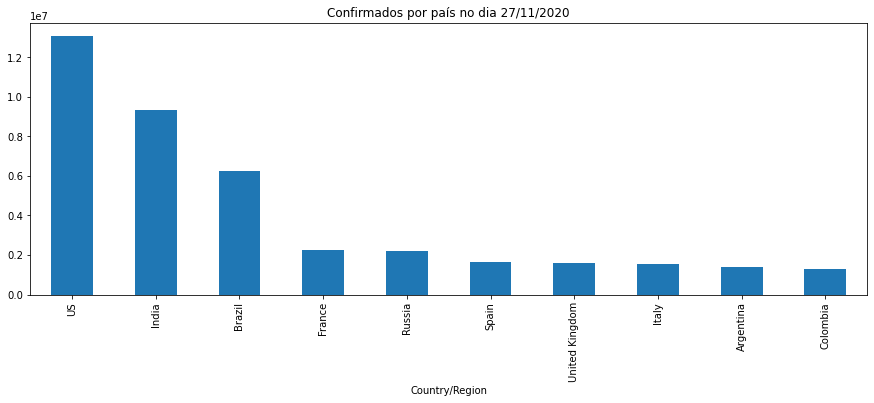

In [25]:
# Casos confirmados por país na última data.
plt.figure(figsize=(15,5))
confirmados_por_pais["11/27/20"].sort_values(ascending = False)[:10].plot(kind="bar")
plt.title("Confirmados por país no dia 27/11/2020")
plt.show()

## Inserindo novos datasets

In [28]:
# Adicionando novos datasets
mortes = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [29]:
mortes.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1645,1650,1661,1675,1687,1695,1712,1725,1737,1740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,646,657,672,685,699,716,735,743,753,771
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2206,2224,2236,2255,2272,2294,2309,2329,2352,2372
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,76,76,76
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,332,333,334,336,337,337,338,340,341,342


In [30]:
recuperados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,35295,35350,35370,35422,35934,35976,36122,36145,36232,36295
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,14216,14565,15055,15469,15842,16230,16666,17031,17352,17755
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46326,46962,47581,48183,48794,49421,50070,50712,51334,51946
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5055,5127,5239,5290,5358,5405,5503,5542,5649,5710
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,6623,7062,7117,7273,7346,7351,7444,7517,7617,7697


In [35]:
# Agrupando por paises
recuperados.groupby("Country/Region").sum()["11/27/20"].head()

Country/Region
Afghanistan    36295
Albania        17755
Algeria        51946
Andorra         5710
Angola          7697
Name: 11/27/20, dtype: int64

In [40]:
# Criando uma função para retornar os agrupamentos.
def ultimos_por_pais(data):
    return data.groupby("Country/Region").sum().iloc[:, -1]

In [41]:
ultimos_por_pais(confirmados).head()

Country/Region
Afghanistan    45839
Albania        36245
Algeria        80168
Andorra         6610
Angola         15008
Name: 11/27/20, dtype: int64

In [44]:
# Criando um array com confirmados, mortes e recuperados.
informacoes = [ultimos_por_pais(confirmados), ultimos_por_pais(mortes), ultimos_por_pais(recuperados)]

In [46]:
# Concatenando os valores
combinados = pd.concat(informacoes, axis = 1)
combinados.columns = ["confirmados", "mortes", "recuperados"]

In [48]:
# Exibindo dados
combinados.head()

,confirmados,mortes,recuperados
Country/Region,,,
Afghanistan,45839,1740,36295
Albania,36245,771,17755
Algeria,80168,2372,51946
Andorra,6610,76,5710
Angola,15008,342,7697


In [50]:
# Taxa de letalidade expressa em %
combinados.sum()
resumo = combinados.sum()
taxa_letalidade_1 = resumo["mortes"]/resumo["confirmados"]
print(taxa_letalidade_1 * 100)

2.340257084312757
